In [1]:
%load_ext lab_black

In [27]:
import pandas as pd
import plotly.graph_objects as go
import requests
import json
import glob
import datetime
import plotly.express as px
from config import api_key
from config import mapbox_token
from calendar import monthrange
from urllib.request import urlopen


# Data pulled from U.S. Fish & Wildlife Service
# https://ecos.fws.gov/ecp/report/species-listings-by-tax-group?statusCategory=Listed&groupName=Birds
endangered_bird_data_to_load = "Resources/endangered_birds.csv"
endangered_df = pd.read_csv(endangered_bird_data_to_load)

recent_bird_sightings_to_load = "Resources/recent_bird_sightings.csv"
recent_birds_df = pd.read_csv(recent_bird_sightings_to_load)

autumn_birds_us_to_load = "Resources/birds_usa.csv"
birds_usa_df = pd.read_csv(autumn_birds_us_to_load)

endangered_tx_fall_to_load = "Resources/endangered_tx_fall.csv"
endangered_tx_fall_df = pd.read_csv(endangered_tx_fall_to_load)

### Number of endangered bird that can be found in each US Fish and Wildlife Service Region.

In [32]:
endangered_df["Region  "].value_counts()

1    50
4    22
2    12
8    10
7     4
5     3
6     1
3     1
Name: Region  , dtype: int64

In [25]:
states = [
    ["Washington", 1],
    ["Oregon", 1],
    ["Idaho", 1],
    ["Hawaii", 1],
    ["Montana", 6],
    ["Wyoming", 6],
    ["Utah", 6],
    ["Colorado", 6],
    ["North Dakota", 6],
    ["South Dakota", 6],
    ["Nebraska", 6],
    ["Kansas", 6],
    ["Minnesota", 3],
    ["Iowa", 3],
    ["Missouri", 3],
    ["Wisconsin", 3],
    ["Illinois", 3],
    ["Indian", 3],
    ["Michigan", 3],
    ["Ohio", 3],
    ["Virginia", 5],
    ["West Virginia", 5],
    ["Maryland", 5],
    ["Delaware", 5],
    ["Pennsylvania", 5],
    ["New York", 5],
    ["New Jersey", 5],
    ["Connecticut", 5],
    ["Rhode Island", 5],
    ["Massachusetts", 5],
    ["Vermont", 5],
    ["New Hampshire", 5],
    ["Maine", 5],
    ["Florida", 4],
    ["Georgia", 4],
    ["South Carolina", 4],
    ["North Carolina", 4],
    ["Alabama", 4],
    ["Mississippi", 4],
    ["Louisianna", 4],
    ["Arkansas", 4],
    ["Tennessee", 4],
    ["Texas", 2],
    ["Oklahoma", 2],
    ["New Mexico", 2],
    ["Arizona", 2],
    ["Alaska", 7],
    ["California", 7],
    ["Nevada", 7],
    ["Kentucky", 7],
]
states_df = pd.DataFrame(states, columns=["State", "Region"])
states_df.head(1)

,State,Region
0,Washington,1


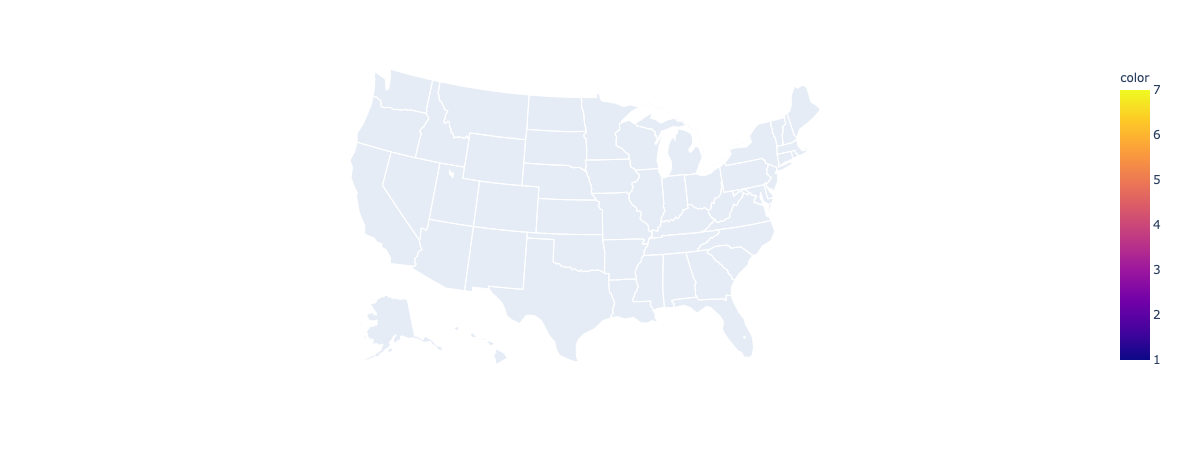

In [28]:
fig = px.choropleth(
    locations=states_df.index,
    locationmode="USA-states",
    color=states_df["Region"],
    scope="usa",
)
fig.show()

### Requesting all bird sightings in the US that have been logged over the last 7 days.
#### This data will be merged with endangered species list to show only the birds that are listed as endangered or threatened.

regionCode = "US"

url = f"https://api.ebird.org/v2/data/obs/{regionCode}/recent"

r = requests.get(url, params={"key": api_key, "back": 7})

r.url

r.status_code

data = r.json()

recent_birds_df = pd.DataFrame(data)
recent_birds_df.to_csv("Recent_Bird_Sightings.csv")

### Recent Bird DataFrame Shows all of the birds that have been sighted in the past 7 days.

In [30]:
recent_birds_df

,Unnamed: 0,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId
0,0,amwpel,American White Pelican,Pelecanus erythrorhynchos,L12395856,"3671–3781 Pacheco Pass Hwy, Gilroy US-CA (36.9...",2020-09-30 12:18,5.0,36.992302,-121.496236,True,False,True,S74233393
1,1,turvul,Turkey Vulture,Cathartes aura,L12395856,"3671–3781 Pacheco Pass Hwy, Gilroy US-CA (36.9...",2020-09-30 12:18,4.0,36.992302,-121.496236,True,False,True,S74233393
2,2,rethaw,Red-tailed Hawk,Buteo jamaicensis,L12395856,"3671–3781 Pacheco Pass Hwy, Gilroy US-CA (36.9...",2020-09-30 12:18,1.0,36.992302,-121.496236,True,False,True,S74233393
3,3,whtkit,White-tailed Kite,Elanus leucurus,L12395856,"3671–3781 Pacheco Pass Hwy, Gilroy US-CA (36.9...",2020-09-30 12:18,1.0,36.992302,-121.496236,True,False,True,S74233393
4,4,norhar2,Northern Harrier,Circus hudsonius,L12395856,"3671–3781 Pacheco Pass Hwy, Gilroy US-CA (36.9...",2020-09-30 12:18,1.0,36.992302,-121.496236,True,False,True,S74233393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,cuckoo3,cuckoo sp. (Cuculidae sp.),Cuculidae sp.,L880645,Michaux SF--Camp Michaux,2020-09-24 07:26,1.0,40.037206,-77.338545,True,True,False,S73994106
980,980,procel2,Procellariid sp.,Procellariidae sp.,L12358210,"88-131 Kai Ave, Captain Cook US-HI 19.20455, -...",2020-09-24 06:29,1.0,19.204553,-155.903710,True,False,True,S74005745
981,981,towshe2,Newell's Shearwater,Puffinus newelli,L7991696,Glass Beach Cliff Seawatch,2020-09-23 18:47,4.0,21.896600,-159.582836,True,False,True,S73986187
982,982,hawpet1,Hawaiian Petrel,Pterodroma sandwichensis,L7991696,Glass Beach Cliff Seawatch,2020-09-23 18:47,1.0,21.896600,-159.582836,True,False,True,S73986187


### Merging endangered bird DataFrame with recent sightings DataFrame to show recent endangered bird sightings.

In [33]:
endangered_recent_df = endangered_df.merge(
    recent_birds_df, left_on="Scientific Name", right_on="sciName"
)
endangered_recent_df.fillna(1, inplace=True)
endangered_recent_df

,Scientific Name,Common Name,Where Listed,Region,ESA Listing Status,Unnamed: 0,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId
0,Gymnogyps californianus,California condor,"U.S.A. only, except where listed as an experim...",8,Endangered,740,calcon,California Condor,Gymnogyps californianus,L851680,Grand Canyon NP--Yaki Point,2020-09-29 09:09,1.0,36.058701,-112.083297,True,False,False,S74228143
1,Gymnogyps californianus,California condor,"U.S.A. (specific portions of Arizona, Nevada, ...",8,"Experimental Population, Non-Essential",740,calcon,California Condor,Gymnogyps californianus,L851680,Grand Canyon NP--Yaki Point,2020-09-29 09:09,1.0,36.058701,-112.083297,True,False,False,S74228143
2,Grus americana,Whooping crane,"Wherever found, except where listed as an expe...",2,Endangered,928,whocra,Whooping Crane,Grus americana,L12371400,"61350, Ottawa US-IL (41.3254,-88.9660)",2020-09-26 09:44,1.0,41.325417,-88.965951,True,True,True,S74085095
3,Grus americana,Whooping crane,"U.S.A. (CO, ID, FL, NM, UT, and the western ha...",4,"Experimental Population, Non-Essential",928,whocra,Whooping Crane,Grus americana,L12371400,"61350, Ottawa US-IL (41.3254,-88.9660)",2020-09-26 09:44,1.0,41.325417,-88.965951,True,True,True,S74085095
4,Grus americana,Whooping crane,"U.S.A. (AL, AR, CO, FL, GA, ID, IL, IN, IA, KY...",2,"Experimental Population, Non-Essential",928,whocra,Whooping Crane,Grus americana,L12371400,"61350, Ottawa US-IL (41.3254,-88.9660)",2020-09-26 09:44,1.0,41.325417,-88.965951,True,True,True,S74085095
5,Grus americana,Whooping crane,U.S.A (Southwestern Louisiana),4,"Experimental Population, Non-Essential",928,whocra,Whooping Crane,Grus americana,L12371400,"61350, Ottawa US-IL (41.3254,-88.9660)",2020-09-26 09:44,1.0,41.325417,-88.965951,True,True,True,S74085095
6,Anas wyvilliana,Hawaiian (=koloa) Duck,Wherever found,1,Endangered,919,hawduc,Hawaiian Duck,Anas wyvilliana,L1169080,Hanalei NWR -- Highway Overlook,2020-09-26 14:00,1.0,22.212723,-159.475786,True,False,False,S74100090
7,Pterodroma sandwichensis,Hawaiian petrel,Wherever found,1,Endangered,982,hawpet1,Hawaiian Petrel,Pterodroma sandwichensis,L7991696,Glass Beach Cliff Seawatch,2020-09-23 18:47,1.0,21.896600,-159.582836,True,False,True,S73986187
8,Mycteria americana,Wood stork,"AL, FL, GA, MS, NC, SC",4,Threatened,128,woosto,Wood Stork,Mycteria americana,L2437906,Florida Gulf Coast University,2020-09-30 11:06,1.0,26.464042,-81.774158,True,False,False,S74242892
9,Charadrius melodus,Piping Plover,"[Great Lakes watershed DPS] - Great Lakes, wat...",3,Endangered,262,pipplo,Piping Plover,Charadrius melodus,L127422,Crandon Park,2020-09-30 09:55,8.0,25.708971,-80.153632,True,False,False,S74243389


In [7]:
# Setting MapBox token.
px.set_mapbox_access_token(mapbox_token)

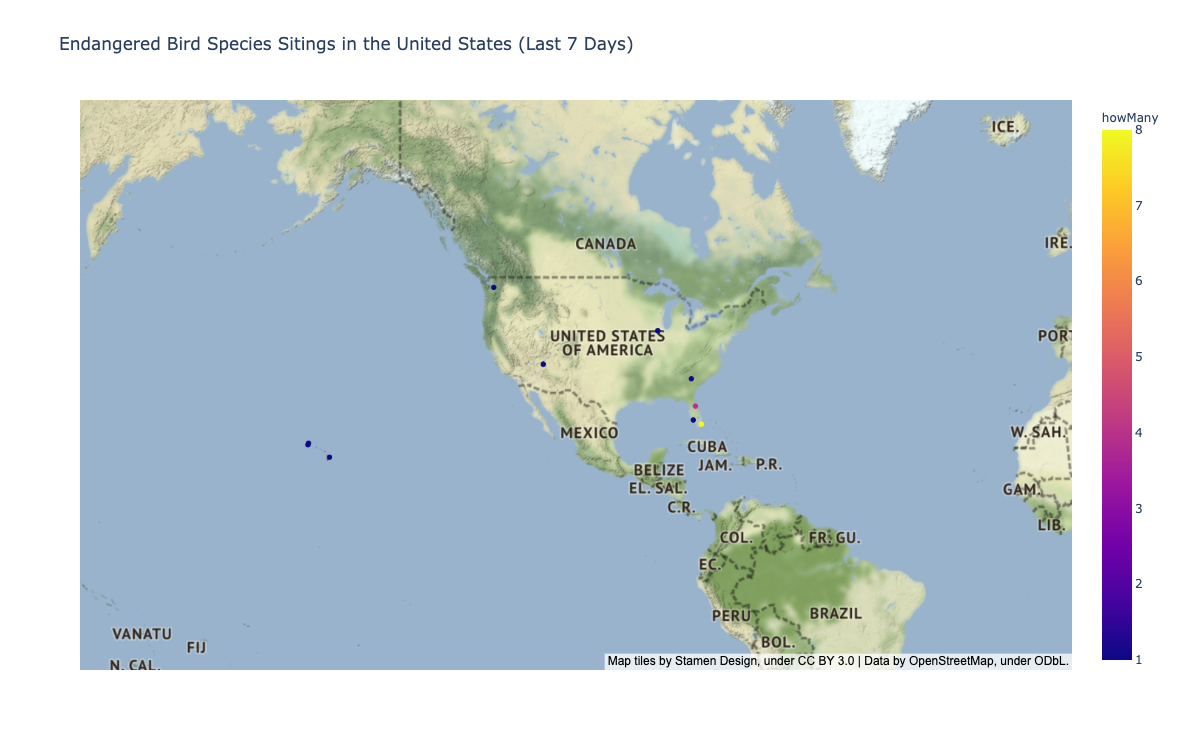

In [58]:
# Generating scatter map.
fig = px.scatter_mapbox(
    endangered_recent_df,
    lat="lat",
    lon="lng",
    color="howMany",
    hover_data=["Common Name", "Scientific Name", "Where Listed", "locName"],
    title="Endangered Bird Species Sitings in the United States (Last 7 Days)",
    height=750,
    mapbox_style="stamen-terrain",
    zoom=1.8,
)
fig.show()

### Now we are going to look at endangered bird sightings for the first day of Autumn and see how these sightings have changed over the years.

![Endangered Header](Resources/Images/Endangered_Bird_Header.png)

#### Pulling Bird Sightings across the entire US on the first day of Autumn and Filtering DataFrame to show only Endangered Bird Sitings

year_results = []
regionCode = "US"
year = []
month = "9"
day = "22"

for year in year_list:
    data = requests.get(
        f"https://api.ebird.org/v2/data/obs/{regionCode}/historic/{year}/{month}/{day}",
        params={"key": api_key},
    ).json()

    for bird in data:
        try:
            results = extract_data(bird)
            results["year"] = year
            year_results.append(results)

        except KeyError:
            pass

birds_usa_df = pd.DataFrame(year_results)

In [38]:
birds_usa_df.fillna(1, inplace=True)
birds_usa_df

,Common Name,Scientific Name,Date Sighted,Location Name,Num Sighted,Latitude,Longitude,year
0,Eastern Screech-Owl,Megascops asio,2020-09-22 23:54,Sommer Park Preserve,1.0,40.411375,-74.775610,2020
1,Black-bellied Plover,Pluvialis squatarola,2020-09-22 23:46,Park Point--Sailing Club,8.0,46.731676,-92.056176,2020
2,shorebird sp.,Charadriiformes sp.,2020-09-22 23:46,Park Point--Sailing Club,1.0,46.731676,-92.056176,2020
3,Eastern Phoebe,Sayornis phoebe,2020-09-22 23:46,Park Point--Sailing Club,3.0,46.731676,-92.056176,2020
4,Common Nighthawk,Chordeiles minor,2020-09-22 23:45,Stewart Corner,1.0,41.899314,-79.655270,2020
...,...,...,...,...,...,...,...,...
6492,Prothonotary Warbler,Protonotaria citrea,2000-09-22,Leesylvania State Park,1.0,38.589809,-77.251745,2000
6493,Black-headed Grosbeak,Pheucticus melanocephalus,2000-09-22,Mt. Davidson,2.0,37.738370,-122.453399,2000
6494,Lazuli Bunting,Passerina amoena,2000-09-22,Desert NWR--Corn Creek (Field Station),1.0,36.438797,-115.359566,2000
6495,Painted Bunting,Passerina ciris,2000-09-22,ULL Experimental Farm (restricted access),5.0,30.093489,-91.870032,2000


#### Creating a list of all of the birds that are classified as endangered by the US Dept. of Fish and Wildlife Services.

In [40]:
endangered_usa_list = endangered_df["Scientific Name"].to_list()

In [41]:
# Filtering DataFrame to show only birds that are on the endangered list.
endangered_usa_fall_df = birds_usa_df[
    birds_usa_df["Scientific Name"].isin(endangered_usa_list)
]
endangered_usa_fall_df

,Common Name,Scientific Name,Date Sighted,Location Name,Num Sighted,Latitude,Longitude,year
355,Yellow-billed Cuckoo,Coccyzus americanus,2020-09-22 18:39,Woodman Fen,1.0,39.730677,-84.126048,2020
376,Wood Stork,Mycteria americana,2020-09-22 18:32,"Cumberland Island, High Point (PRIVATE)",5.0,30.915645,-81.420958,2020
421,Piping Plover,Charadrius melodus,2020-09-22 18:20,Galveston--8 mile Beach/Sunny Beach area,1.0,29.234920,-94.882994,2020
546,California Condor,Gymnogyps californianus,2020-09-22 17:14,Glen Canyon NRA--Navajo Bridge,8.0,36.817170,-111.630149,2020
576,Marbled Murrelet,Brachyramphus marmoratus,2020-09-22 16:54,Boiler Bay State Wayside,4.0,44.828817,-124.065900,2020
...,...,...,...,...,...,...,...,...
6013,California Condor,Gymnogyps californianus,2005-09-22,California - Monterey - Big Sur,1.0,36.264654,-121.801049,2005
6046,Wood Stork,Mycteria americana,2000-09-22 18:15,Big Black River and I-20,1.0,32.353300,-90.630199,2000
6163,Marbled Murrelet,Brachyramphus marmoratus,2000-09-22 14:45,Glacier Bay NP--Icy Strait (@mouth of Glacier ...,4.0,58.349866,-136.005249,2000
6394,Yellow-billed Cuckoo,Coccyzus americanus,2000-09-22 06:20,Cape Island--Higbee Beach WMA,3.0,38.961389,-74.960833,2000


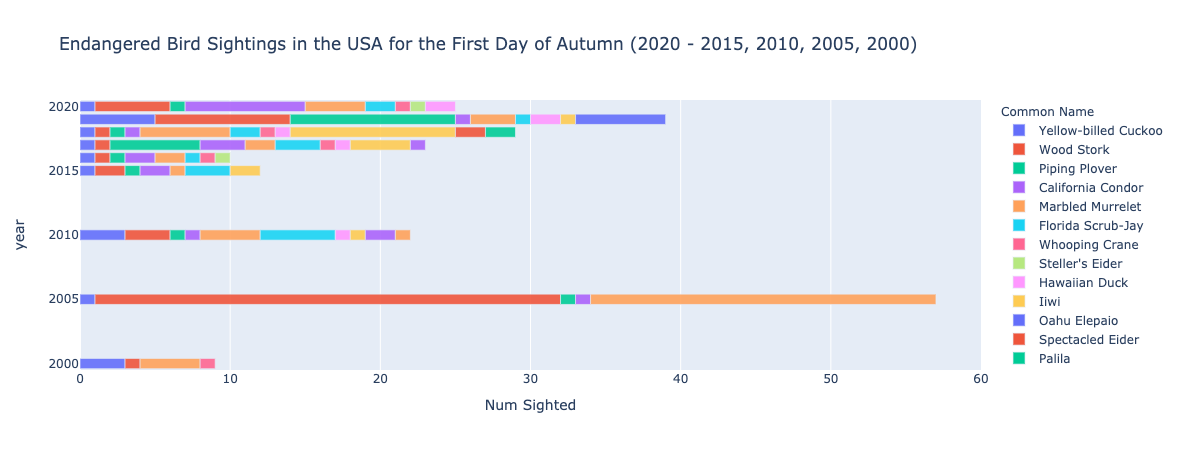

In [43]:
barchart = px.bar(
    endangered_usa_fall_df,
    x="Num Sighted",
    y="year",
    color="Common Name",
    opacity=0.9,
    orientation="h",
    barmode="relative",
    hover_data=["Scientific Name", "Date Sighted", "Location Name"],
    title="Endangered Bird Sightings in the USA for the First Day of Autumn (2020 - 2015, 2010, 2005, 2000)",
)
barchart

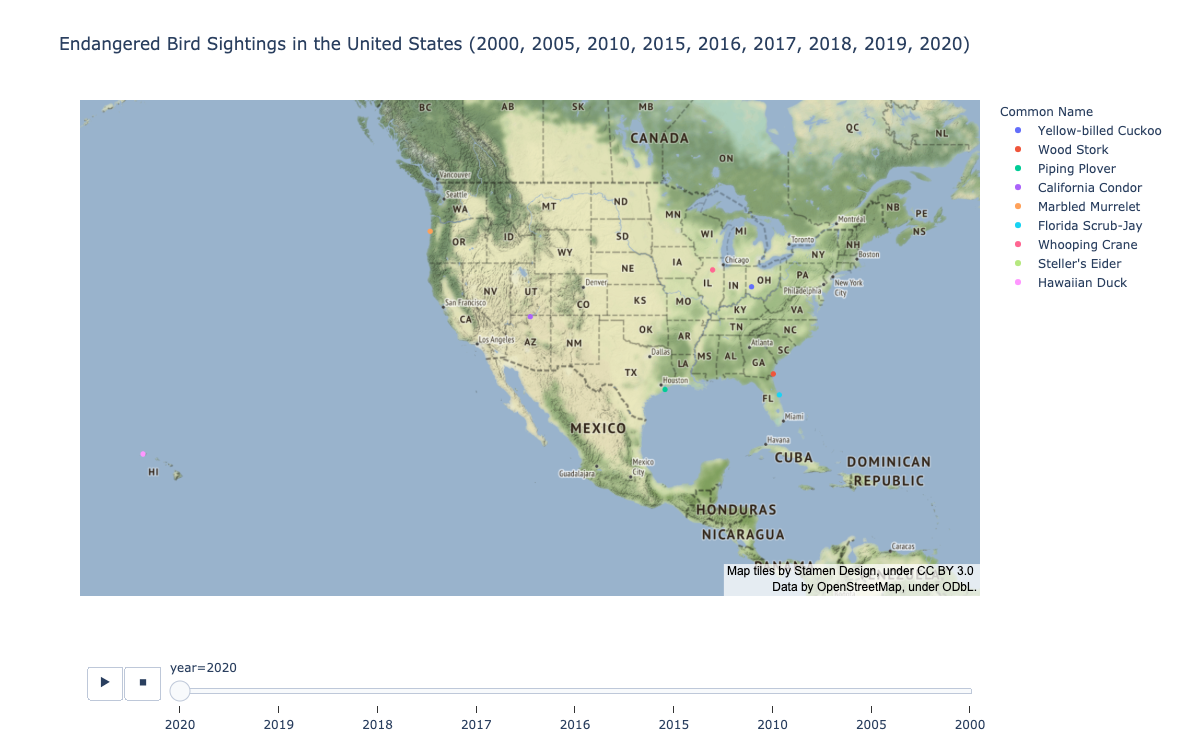

In [59]:
fig = px.scatter_mapbox(
    endangered_usa_fall_df,
    lat="Latitude",
    lon="Longitude",
    color="Common Name",
    hover_data=["Common Name", "Scientific Name", "Location Name", "year"],
    title="Endangered Bird Sightings in the United States (2000, 2005, 2010, 2015, 2016, 2017, 2018, 2019, 2020)",
    height=750,
    mapbox_style="stamen-terrain",
    zoom=2.5,
    animation_frame="year",
)
fig.show()

![Endangered Header](Resources/Images/Endangered_Bird_Header.png)

### Bird Sightings in Texas over a number of years.

In [20]:
# List of years to plug into API request
year_list = ["2020", "2019", "2018", "2017", "2016", "2015", "2010", "2005", "2000"]

In [45]:
year_results = []
regionCode = "US-TX"
year = []
month = "9"
day = "22"

for year in year_list:
    data = requests.get(
        f"https://api.ebird.org/v2/data/obs/{regionCode}/historic/{year}/{month}/{day}",
        params={"key": api_key},
    ).json()

    for bird in data:
        try:
            results = extract_data(bird)
            results["year"] = year
            year_results.append(results)

        except KeyError:
            pass

tx_df = pd.DataFrame(year_results)

In [46]:
tx_df.fillna(1, inplace=True)
tx_df

,Common Name,Scientific Name,Date Sighted,Location Name,Num Sighted,Latitude,Longitude,year
0,Green Heron,Butorides virescens,2020-09-22 23:09,Bass Loop,1.0,30.549047,-97.663546,2020
1,Dickcissel,Spiza americana,2020-09-22 23:09,Bass Loop,1.0,30.549047,-97.663546,2020
2,Ruby-throated Hummingbird,Archilochus colubris,2020-09-22 21:19,Lakes of Parkway Bylake or Bywater,1.0,29.747171,-95.628974,2020
3,Great Horned Owl,Bubo virginianus,2020-09-22 20:35,E Brown Ave,1.0,30.365294,-103.659657,2020
4,Blue Jay,Cyanocitta cristata,2020-09-22 20:28,Barry's Place,2.0,29.809506,-95.764204,2020
...,...,...,...,...,...,...,...,...
2521,Townsend's Warbler,Setophaga townsendi,2000-09-22,"Mackenzie Park, Lubbock (PHP 024)",2.0,33.585600,-101.828715,2000
2522,Summer Tanager,Piranga rubra,2000-09-22,Balcones Canyonlands NWR--Refuge HQ (Travis Co.),1.0,30.507111,-98.023946,2000
2523,Northern Cardinal,Cardinalis cardinalis,2000-09-22,Balcones Canyonlands NWR--Refuge HQ (Travis Co.),1.0,30.507111,-98.023946,2000
2524,Indigo Bunting,Passerina cyanea,2000-09-22,Tyrrell Park--Cattail Marsh,1.0,30.007423,-94.140043,2000


In [34]:
def extract_data(data):
    return {
        "Common Name": data.get("comName"),
        "Scientific Name": data.get("sciName"),
        "Date Sighted": data.get("obsDt"),
        "Location Name": data.get("locName"),
        "Num Sighted": data.get("howMany"),
        "Latitude": data.get("lat"),
        "Longitude": data.get("lng"),
    }

year_results = []
regionCode = "US-TX"
year = []
month = "9"
day = "22"

print("Beginning Data Retrieval")
print("----------------------------------------")

for year in year_list:
    data = requests.get(
        f"https://api.ebird.org/v2/data/obs/{regionCode}/historic/{year}/{month}/{day}",
        params={"key": api_key},
    ).json()

    for bird in data:
        try:
            results = extract_data(bird)
            results["year"] = year
            year_results.append(results)

        except KeyError:
            print(bird)
            pass

sc_df = pd.DataFrame(year_results)
sc_df.fillna(1, inplace=True)
sc_df.to_csv("south_carolina_sightings.csv")

In [11]:
# Combining all CSVs that include the all of the bird sitings in the states that reported endangered bird sitings in the past 7 days. I picked the first day of Autumnfor each year indicated in year_list.
path = "Resources/Endangered_State_Files"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

birds_states_df = pd.concat(li, axis=0, ignore_index=True)

In [12]:
birds_states_df

,Unnamed: 0,Common Name,Scientific Name,Date Sighted,Location Name,Num Sighted,Latitude,Longitude,year
0,0,Great Horned Owl,Bubo virginianus,2020-09-22 20:05,Mingo Point,1.0,32.596322,-80.131313,2020
1,1,Gray Catbird,Dumetella carolinensis,2020-09-22 19:15,The Parkway Retention Pond,4.0,34.865668,-82.260447,2020
2,2,Northern Cardinal,Cardinalis cardinalis,2020-09-22 19:15,The Parkway Retention Pond,2.0,34.865668,-82.260447,2020
3,3,Mourning Dove,Zenaida macroura,2020-09-22 19:09,Kenwood Ave,1.0,34.382002,-80.074357,2020
4,4,Chimney Swift,Chaetura pelagica,2020-09-22 19:09,Kenwood Ave,17.0,34.382002,-80.074357,2020
...,...,...,...,...,...,...,...,...,...
8953,1867,American Crow,Corvus brachyrhynchos,2000-09-22,Yakima River Delta,1.0,46.240657,-119.235578,2000
8954,1868,Violet-green Swallow,Tachycineta thalassina,2000-09-22,Yakima River Delta,1.0,46.240657,-119.235578,2000
8955,1869,Bank Swallow,Riparia riparia,2000-09-22,Yakima River Delta,2.0,46.240657,-119.235578,2000
8956,1870,Cliff Swallow,Petrochelidon pyrrhonota,2000-09-22,Yakima River Delta,1.0,46.240657,-119.235578,2000


In [13]:
# List of birds (scientific name) that have been seen in the US over the last 7 days.
endangered_list = endangered_recent_df["Scientific Name"].to_list()
endangered_list_unique = list(set(endangered_list))
endangered_list_unique

['Gymnogyps californianus',
 'Grus americana',
 'Mycteria americana',
 'Aphelocoma coerulescens',
 'Drepanis coccinea',
 'Charadrius melodus',
 'Pterodroma sandwichensis',
 'Coccyzus americanus',
 'Anas wyvilliana',
 'Brachyramphus marmoratus']

## Endangered bird sitings for the states that reported endagered bird sightings in the past seven days

In [14]:
endangered_bird_states_df = birds_states_df[
    birds_states_df["Scientific Name"].isin(endangered_list_unique)
]
endangered_bird_states_df

,Unnamed: 0,Common Name,Scientific Name,Date Sighted,Location Name,Num Sighted,Latitude,Longitude,year
111,111,Yellow-billed Cuckoo,Coccyzus americanus,2020-09-22 15:30,Saluda Shoals Park,1.0,34.048615,-81.182935,2020
118,118,Wood Stork,Mycteria americana,2020-09-22 14:42,House,31.0,32.707533,-79.956726,2020
149,149,Piping Plover,Charadrius melodus,2020-09-22 12:01,Huntington Beach SP,3.0,33.508300,-79.065900,2020
208,208,Wood Stork,Mycteria americana,2019-09-22 19:31,SC Berkeley Sweetwater yard,1.0,32.897865,-79.911519,2019
332,332,Yellow-billed Cuckoo,Coccyzus americanus,2019-09-22 10:43,"Collums Millpond 543 Edisto Lake Road, Wagener...",1.0,33.679185,-81.335949,2019
...,...,...,...,...,...,...,...,...,...
8094,1008,Marbled Murrelet,Brachyramphus marmoratus,2017-09-22 15:42,"5557 Maple Way, Blaine US-WA (48.8863,-122.7864)",2.0,48.886278,-122.786364,2017
8271,1185,Marbled Murrelet,Brachyramphus marmoratus,2016-09-22 16:30,Ediz Hook,2.0,48.140350,-123.447110,2016
8504,1418,Marbled Murrelet,Brachyramphus marmoratus,2015-09-22 17:00,Charles Richey Sr. Viewpoint,1.0,47.572654,-122.414019,2015
8708,1622,Marbled Murrelet,Brachyramphus marmoratus,2010-09-22 13:00,"Lighthouse Marine Park, Point Roberts",4.0,48.972242,-123.083671,2010


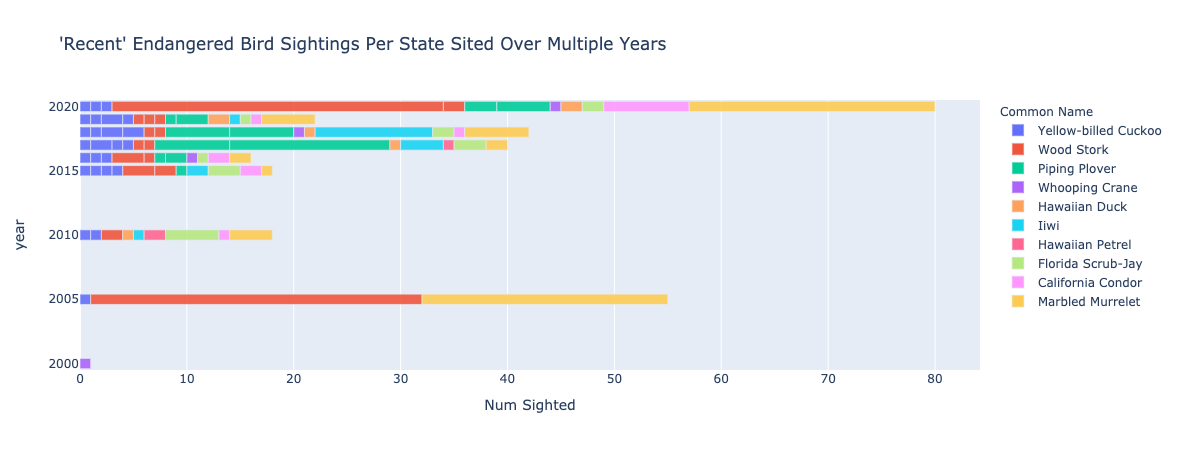

In [15]:
barchart = px.bar(
    endangered_bird_states_df,
    x="Num Sighted",
    y="year",
    color="Common Name",
    opacity=0.9,
    orientation="h",
    barmode="relative",
    hover_data=["Scientific Name", "Date Sighted", "Location Name"],
    title="'Recent' Endangered Bird Sightings Per State Sited Over Multiple Years",
)
barchart

### Creating a chart to visualize the change in sightings of endagered birds in the state of Texas over a number of years.

endangered_tx_fall_df = tx_df[tx_df["Scientific Name"].isin(endangered_usa_list)]
endangered_tx_fall_df

In [21]:
endangered_tx_fall_df.to_csv("endangered_tx_fall.csv")

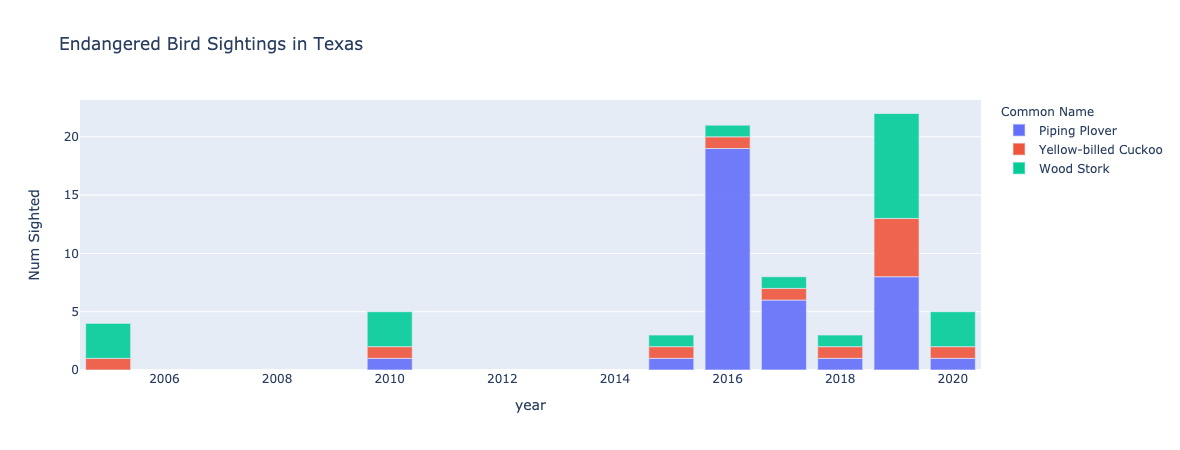

In [22]:
barchart = px.bar(
    endangered_tx_fall_df,
    x="year",
    y="Num Sighted",
    color="Common Name",
    opacity=0.9,
    orientation="v",
    barmode="relative",
    hover_data=["Scientific Name", "Date Sighted", "Location Name"],
    title="Endangered Bird Sightings in Texas",
)
barchart

In [23]:
fig = px.scatter_mapbox(
    endangered_tx_fall_df,
    lat="Latitude",
    lon="Longitude",
    color="Common Name",
    hover_data=["Common Name", "Scientific Name", "Location Name", "year"],
    title="Endangered Bird Sightings in Texas (2000, 2005, 2010, 2015, 2016, 2017, 2018, 2019, 2020)",
    height=750,
    zoom=4.5,
    animation_frame="year",
)

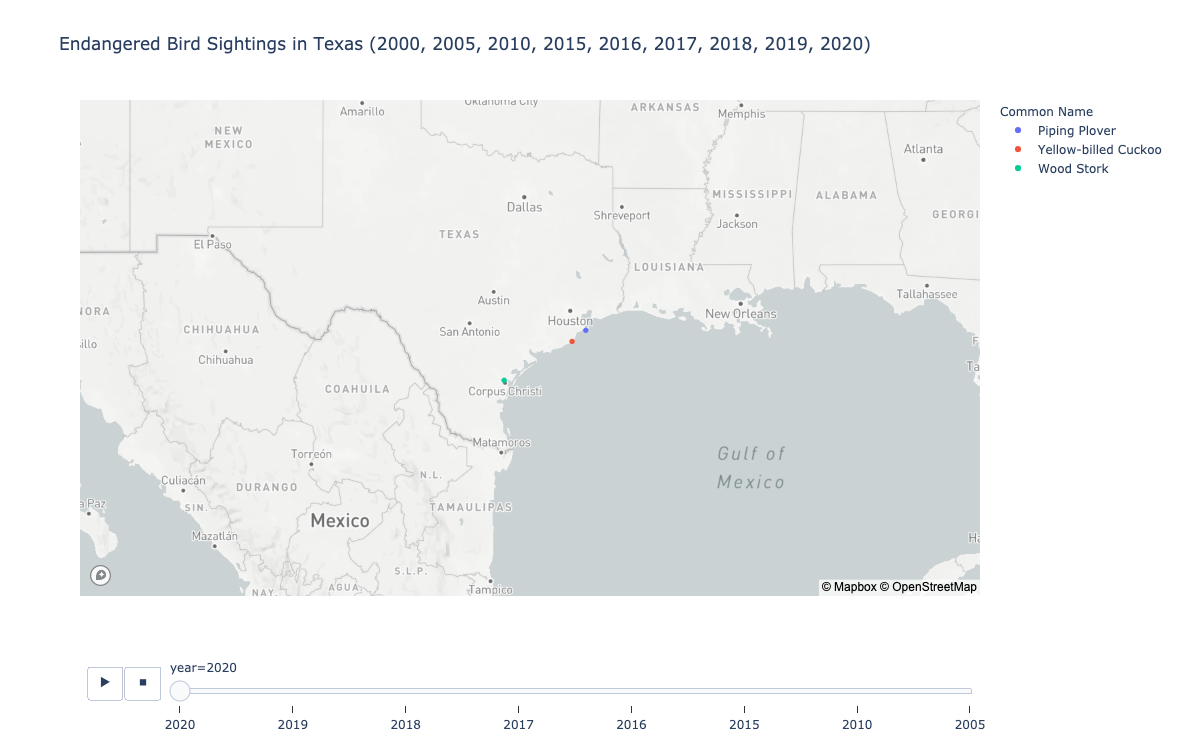

In [24]:
fig.show()

![Endangered Texas Birds](Resources/Images/Endangered_Texas.png)